In [1]:
## Packages
'''Import all the necessary packages and modules'''

from pycroscopy.io.translators.df_utils.dm_utils import read_dm3
from scipy import signal as ss
import scipy as sp
import numpy as np # package for playing with matrices
import matplotlib.pyplot as plt
import sys, os # python modules for interacting with computer
from tkinter import filedialog # interface for opening a file explorer
from tkinter import * # * imports all files in tkinter
import glob

'''Disregard warning for now'''

C:\Users\Boo\Anaconda3\envs\peabody\lib\site-packages\pycroscopy\__init__.py:31: FutureWarning: Contents of pycroscopy.core such as hdf_utils, plot_utils have been moved to pyUSID but will continue to be available implicitly till the next release. Please update import statements to import such modules directly frompyUSID. See - https://pycroscopy.github.io/pycroscopy/whats_new.html under June 28 2018
  'pyUSID. See - https://pycroscopy.github.io/pycroscopy/whats_new.html under June 28 2018', FutureWarning)


'Disregard warning for now'

In [2]:
## Data Directory GUI
'''Getting data directory so data can easily be imported 
Select the folder that contains the data you want to import
'''

root = Tk() # Tk() is a function in tkinter that opens a window
root.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
root.withdraw() # closes the tkinter window since it's unnecessary
oldcwd = os.getcwd() # saves old called working directory (place where data is drawn from) as oldcwd use os.chdir(oldcwd) to go back
os.chdir(root.directory) # sets new directory
newcwd = os.getcwd() # saves new directory name as newcwd

In [3]:
## Load Data use for .csv data
''' Makes a list of all the files with the extension use * to select all '''

path = root.directory + '/*.dm3' # Change '' as needed
file_list=glob.glob(path)
list(enumerate(file_list)) # list all files and their corresponding index in the list file_list

[(0, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0035.dm3'),
 (1, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0036.dm3'),
 (2, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0037.dm3'),
 (3, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0038.dm3'),
 (4, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0039.dm3'),
 (5, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0040.dm3'),
 (6, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0041.dm3'),
 (7, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0042.dm3'),
 (8, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0043.dm3'),
 (9, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0044.dm3'),
 (10, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0045.dm3'),
 (11, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0046.dm3'),
 (12, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0047.dm3'),
 (13, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_0048.dm3'),
 (14, 'C:/Users/Boo/Downloads/Peabody Data/Test2\\Test2_00

In [4]:
## Load Data
''' Open data and set up for analysis'''
image_size= read_dm3(file_list[0])[0].shape
num_images=len(file_list)
stack_size=(image_size[0],image_size[1], len(file_list)) # set size of data_stack 
data_stack=np.zeros(stack_size) # Preallocate the data_stack
meta_size=[]
'''Determine the size of the meta data'''
for n in range(len(file_list)): 
    meta_size.append(len(list(read_dm3(file_list[n])[1].items())))
meta_dim1=np.max(meta_size)
meta_stack=np.zeros((meta_dim1,2,len(file_list)),dtype=np.object_)
'''Parse the image intensities from the meta data and load into data_stack and meta_stack'''
for n in range(len(file_list)):
#     print(n)
    data_stack[:,:,n]=read_dm3(file_list[n])[0]
    string_stack=list(read_dm3(file_list[n])[1].items())
    if len(string_stack)<meta_dim1:
        diff=meta_dim1-len(string_stack)
        for x in range(diff):
            string_stack.append(([],[]))
    meta_stack[:,:,n]=string_stack # Use meta_stack[:,:,#] to look at the meta_data for file #

In [34]:
## Add data whitening here
for n in range(len(file_list)):
    data_stack[np.where(data_stack<0),n]=0
    

In [51]:
## Draw Several lines to integrate across to get an average line plot
'''Choose points to define line then creates an array of lines parallel to that for integration'''
# Make a line with "num" points...
x0, y0 = 200, 700 # These are in _pixel_ coordinates!!
x1, y1 = 850, 150
num = 1000 # number of data points used to create each line for line plot
mag=6000 #magnification Used for getting scale bar correct
l_length=((x1-x0)**2+(y1-y0)**2)**.5 # length of line
d_perpix=24 #distance per pixel um Used for getting scale bar correct
d_actual=l_length/(num)*d_perpix/mag #Actual distance of object on screen Used for getting scale bar correct
width=701 #How wide you want the line plot integration to be in pixels (odd number only)
m=(y1-y0)/(x1-x0) #slope of the line (may use later for a different way of analyzing)
m_perp=-1/m
x=np.zeros((num,width))
y=np.zeros((num,width))
spacer=50
'''Create array of parallel lines spaced out by spacer to be used for visuallizing on next plot'''
for n in np.arange(0,int(width/2),spacer): 
    x0_edgep=x0+(n/2)/(1+m_perp**2)**.5
    x0_edgen=x0-(n/2)/(1+m_perp**2)**.5
    x1_edgep=x1+(n/2)/(1+m_perp**2)**.5
    x1_edgen=x1-(n/2)/(1+m_perp**2)**.5
    y0_edgep=y0+(n/2)/(1+m_perp**2)**.5
    y0_edgen=y0-(n/2)/(1+m_perp**2)**.5
    y1_edgep=y1+(n/2)/(1+m_perp**2)**.5
    y1_edgen=y1-(n/2)/(1+m_perp**2)**.5
    xp, yp = np.linspace(x0_edgep, x1_edgep, num), np.linspace(y0_edgep, y1_edgep, num)
    xn, yn = np.linspace(x0_edgen, x1_edgen, num), np.linspace(y0_edgen, y1_edgen, num)
    index=int(-n+width/2)
#     print(n,index)
    x[:,int(-n+width/2)]=xn
    x[:,int(n+width/2)]=xp
    y[:,int(-n+width/2)]=yn
    y[:,int(n+width/2)]=yp
#     print(y0_edgep,y1_edgep,y0_edgen,y1_edgen)
    
# z=data_stack[:,:,1]
# Extract the values along the line, using cubic interpolation

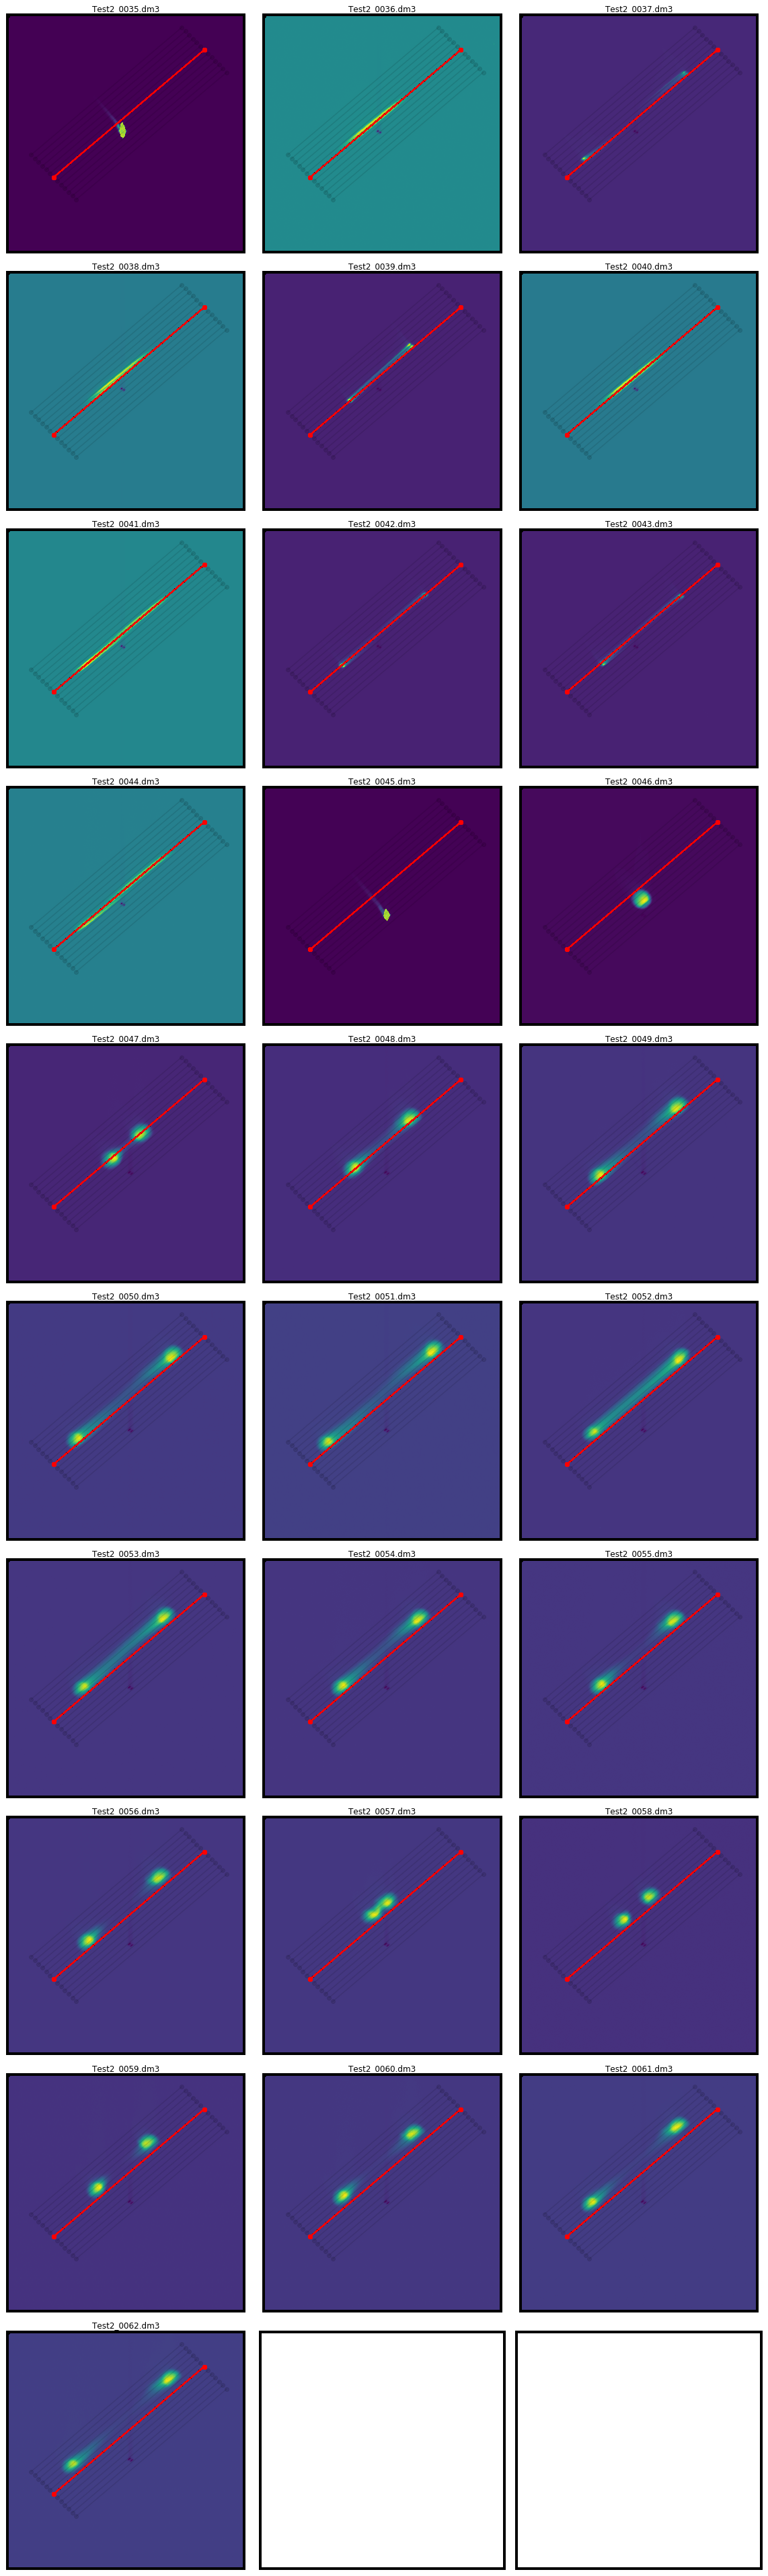

In [42]:
## Plot Data
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,n_rows*16/3)
fig, axs = plt.subplots(nrows=n_rows, ncols=3,
                        subplot_kw={'xticks': [], 'yticks': []})
# axs.imshow(z)
alph=.1
# fig.subplots_adjust(left=0.03, right=0.97, hspace=0.01, wspace=0.01)
z_lave = np.zeros((num,len(file_list)))
for ax,k in zip(axs.flat,range(len(file_list))):

    z=data_stack[:,:,k]-np.min(data_stack[:,:,k])
    ax.imshow(z)
    ax.set_title(file_list[k].split('\\')[1],fontsize=12)
    z_lines=np.zeros(x.shape)
    z_lines_reduced=[]
    for l in range(width):
#         zi = z[x[:,l].astype(np.int), y[:,l].astype(np.int)]
        ax.plot([x0, x1], [y0, y1], 'ro-')
        ax.plot([x[0,l], x[-1,l]], [y[0,l], y[-1,l]], 'ko-',alpha=alph)
#         z_lines[:,l]=zi

        
#     ax2.plot(zi)
plt.tight_layout()
plt.show()

In [49]:
## Integrate data for line plots
'''Create array of parallel lines spaced out by spacer to be used for visuallizing on next plot'''
spacer=.5
for n in np.arange(0,int(width/2),spacer): 
    x0_edgep=x0+(n/2)/(1+m_perp**2)**.5
    x0_edgen=x0-(n/2)/(1+m_perp**2)**.5
    x1_edgep=x1+(n/2)/(1+m_perp**2)**.5
    x1_edgen=x1-(n/2)/(1+m_perp**2)**.5
    y0_edgep=y0+(n/2)/(1+m_perp**2)**.5
    y0_edgen=y0-(n/2)/(1+m_perp**2)**.5
    y1_edgep=y1+(n/2)/(1+m_perp**2)**.5
    y1_edgen=y1-(n/2)/(1+m_perp**2)**.5
    xp, yp = np.linspace(x0_edgep, x1_edgep, num), np.linspace(y0_edgep, y1_edgep, num)
    xn, yn = np.linspace(x0_edgen, x1_edgen, num), np.linspace(y0_edgen, y1_edgen, num)
    index=int(-n+width/2)
#     print(n,index)
    x[:,int(-n+width/2)]=xn
    x[:,int(n+width/2)]=xp
    y[:,int(-n+width/2)]=yn
    y[:,int(n+width/2)]=yp
z_lave = np.zeros((num,len(file_list)))

for k in range(len(file_list)):
    z=data_stack[:,:,k]
    z_lines=np.zeros(x.shape)
    z_lines_reduced=[]
    for l in range(width):
        zi = z[x[:,l].astype(np.int), y[:,l].astype(np.int)]
        z_lines[:,l]=zi
        if np.sum(z_lines[:,l],axis=0)>0: # remove excess lines from average response
            z_lines_reduced.append(z_lines[:,l])
    z_lines_reduced=np.asarray(z_lines_reduced)
    z_lave[:,k]=np.mean(z_lines_reduced, axis=0)

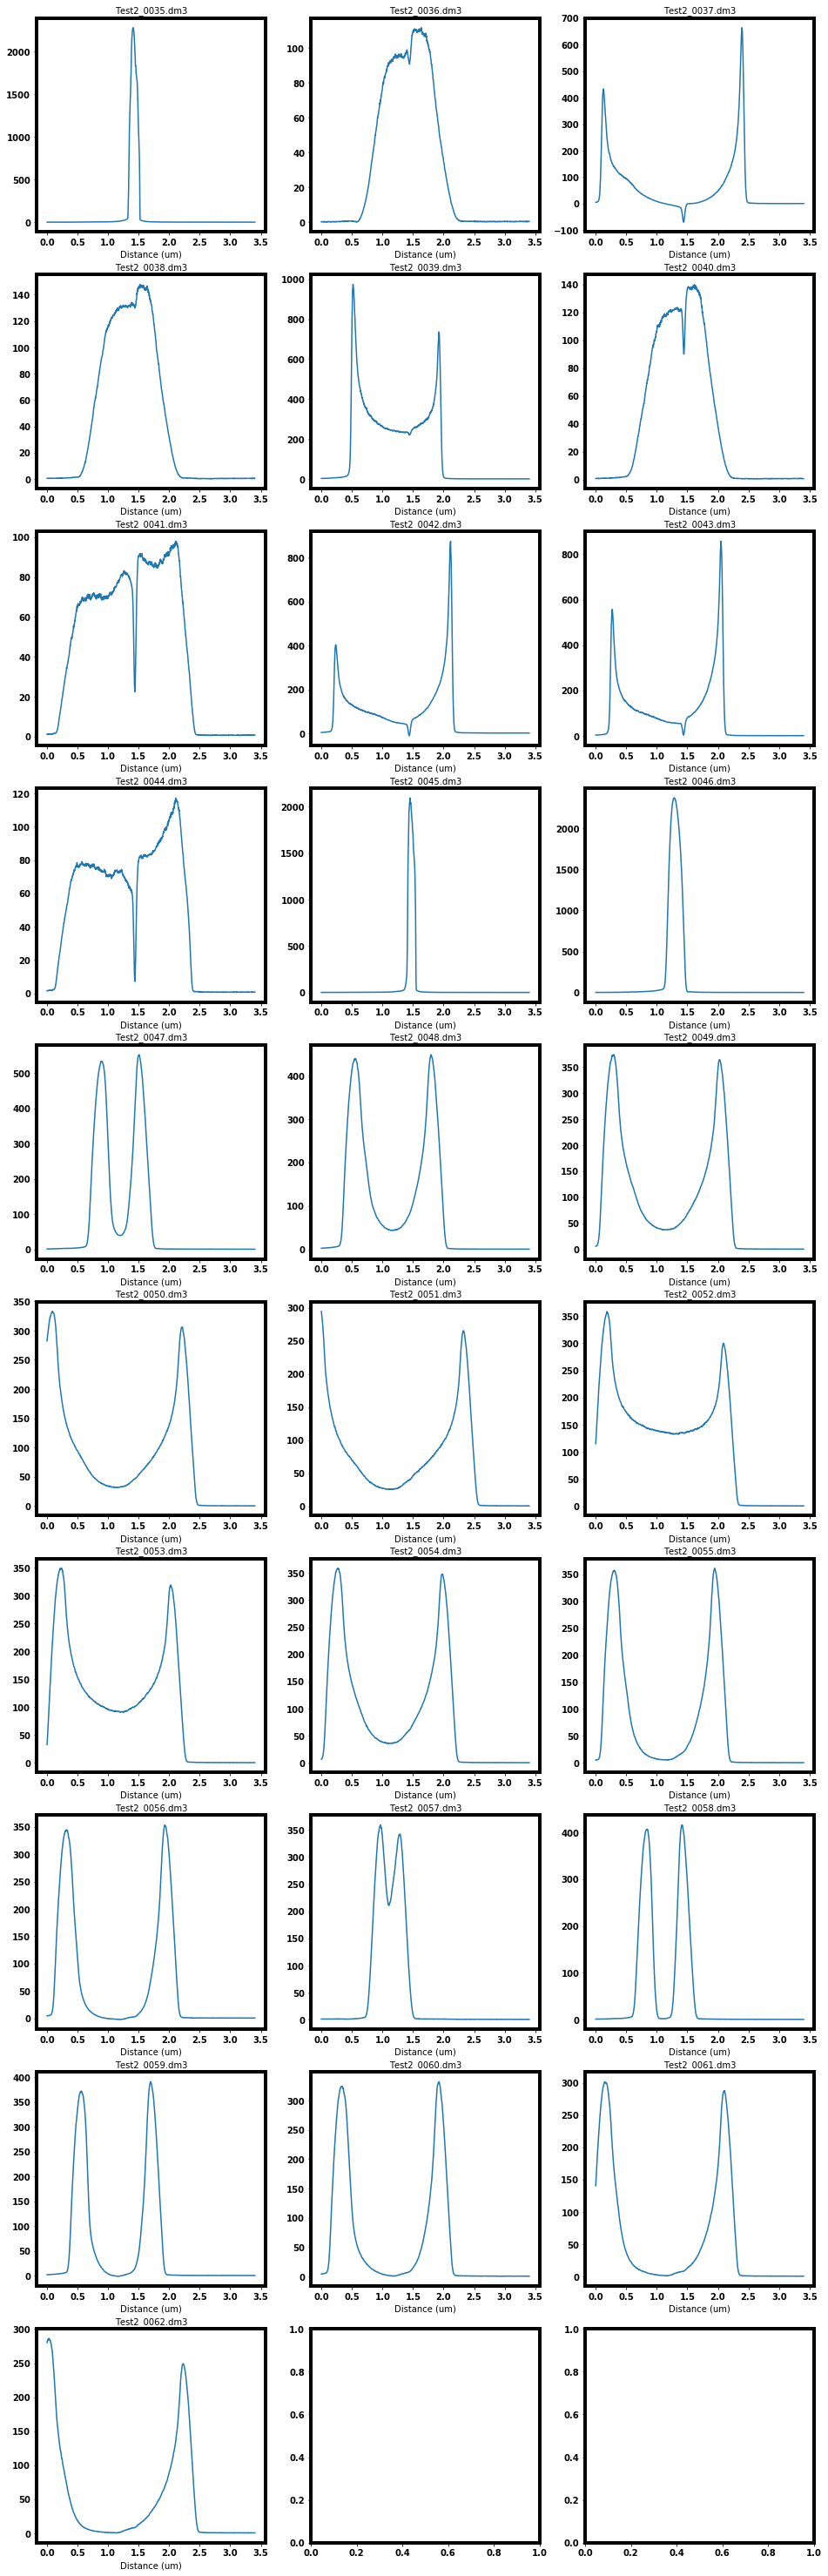

In [52]:
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,n_rows*16/3)
X= np.arange(0,num)*d_actual
fig, axs = plt.subplots(nrows=n_rows, ncols=3)
for ax,k in zip(axs.flat,range(len(file_list))):
    ax.plot(X,z_lave[:,k])
    ax.set_title(file_list[k].split('\\')[1],fontsize=10)
    ax.set_xlabel('Distance (um)')

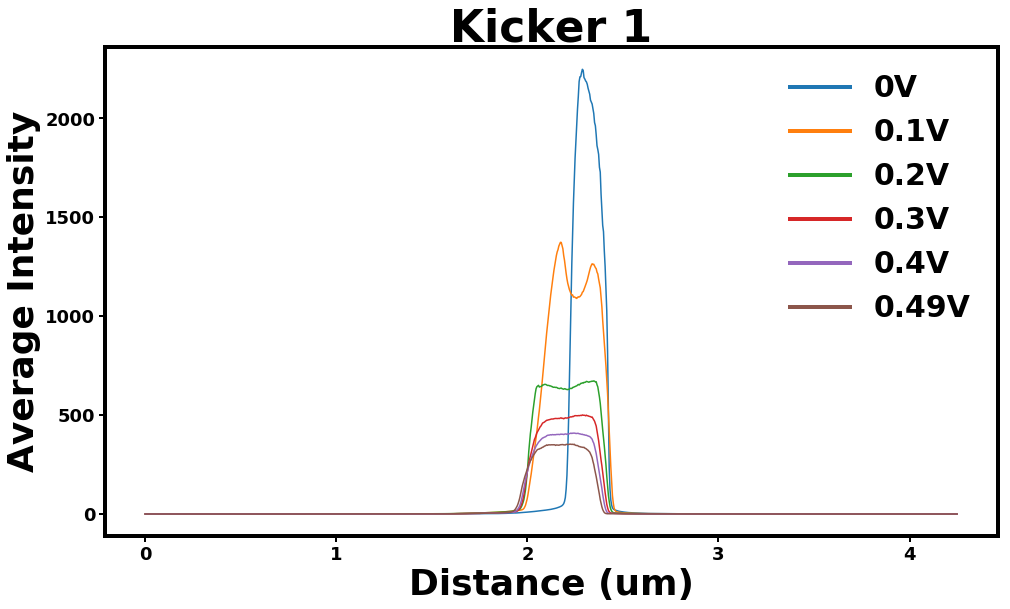

In [35]:
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,9)

Labels=['0V','0.1V','0.2V','0.3V','0.4V','0.49V']
fig, ax1 = plt.subplots()
plt.title('Kicker 1', fontsize=44, fontweight='bold')
ax1.set_xlabel('Distance (um)', fontsize=36, fontweight='bold')
ax1.set_ylabel('Average Intensity', fontsize=36, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)

for k in range(6):
    ax1.plot(X,z_lave[:,k],label=Labels[k])

leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

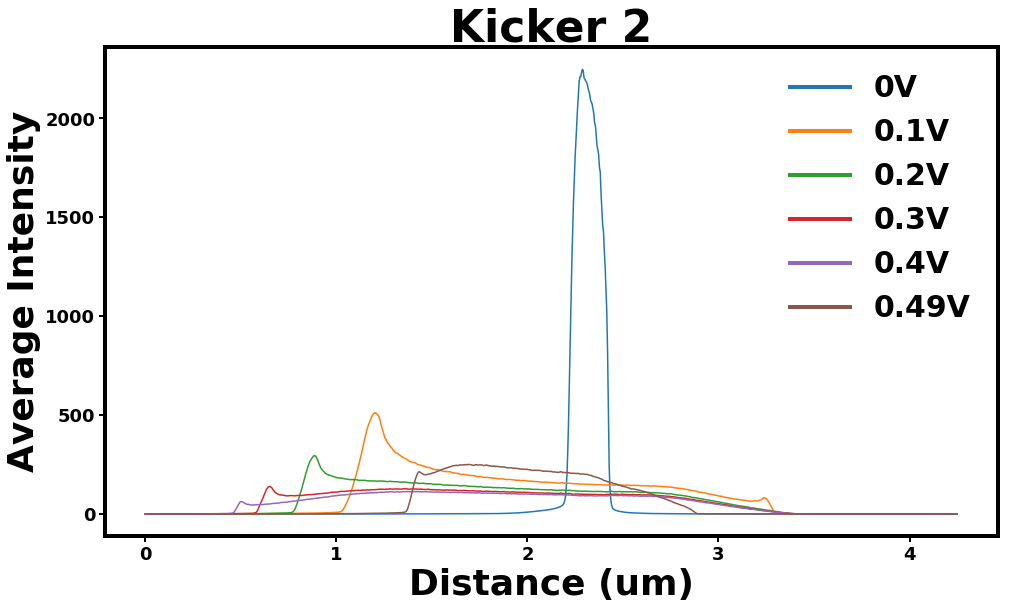

In [36]:
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,9)

Labels=['0V','0.1V','0.2V','0.3V','0.4V','0.49V']
fig, ax1 = plt.subplots()
plt.title('Kicker 2', fontsize=44, fontweight='bold')
ax1.set_xlabel('Distance (um)', fontsize=36, fontweight='bold')
ax1.set_ylabel('Average Intensity', fontsize=36, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
data_select=[0,7,8,9,10,11]
for a,k in enumerate(data_select):
    ax1.plot(X,z_lave[:,k],label=Labels[a])

leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

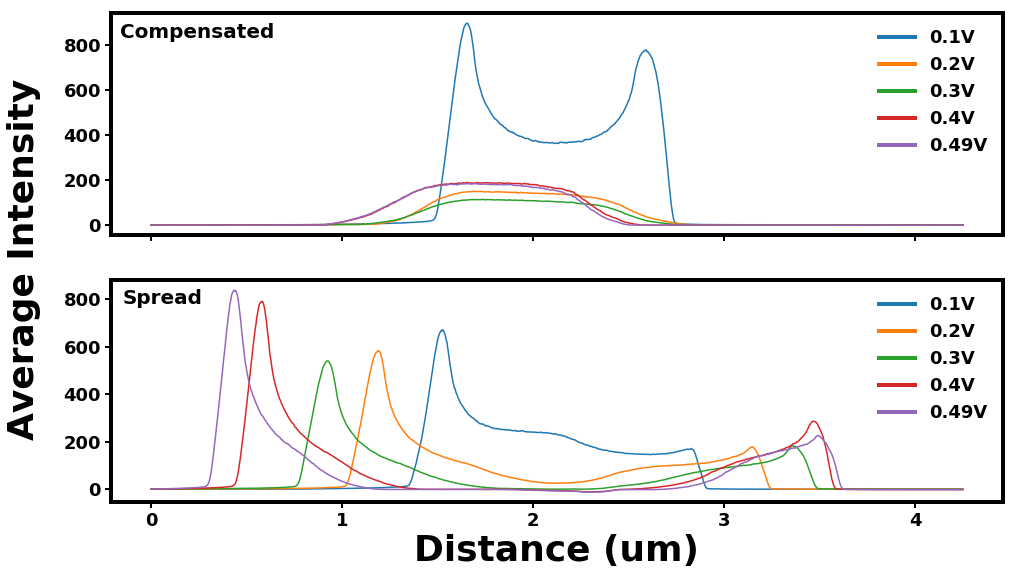

In [37]:
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,9)

# Labels=['0.1V','0.2V','0.3V','0.4V','0.49V']
Labels=['0.1V','0.1V','0.2V','0.2V','0.3V','0.3V','0.4V','0.4V','0.49V','0.49V']
# Labels=['13','14','15','16','18','17','21','22','24','23']
fig, (ax1,ax2) = plt.subplots(2, sharex=True)
# plt.title('Both Kickers', fontsize=44, fontweight='bold')
ax2.set_xlabel('Distance (um)', fontsize=36, fontweight='bold')
fig.text(0.05, 0.5,'Average Intensity', ha='center', va='center', rotation='vertical', fontsize=36, fontweight='bold')
fig.text(0.2, 0.85,'Compensated', ha='center', va='center', fontsize=20, fontweight='bold')
fig.text(0.17, 0.44,'Spread', ha='center', va='center', fontsize=20, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)

ax2.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax2.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
data_select=[13,14,15,16,18,17,21,22,24,23]
b=0
c=0
for a,k in enumerate(data_select):
    if a%2:
        ax1.plot(X,z_lave[:,k-1],label=Labels[a])
        b+=1
    else:
        ax2.plot(X,z_lave[:,k-1],label=Labels[a])
        c+=1
leg1=ax1.legend(fontsize=18, loc='best', frameon=False)
leg2=ax2.legend(fontsize=18, loc='best', frameon=False)
for legobj in leg1.legendHandles:
    legobj.set_linewidth(4.0)
    
for legobj in leg2.legendHandles:
    legobj.set_linewidth(4.0)

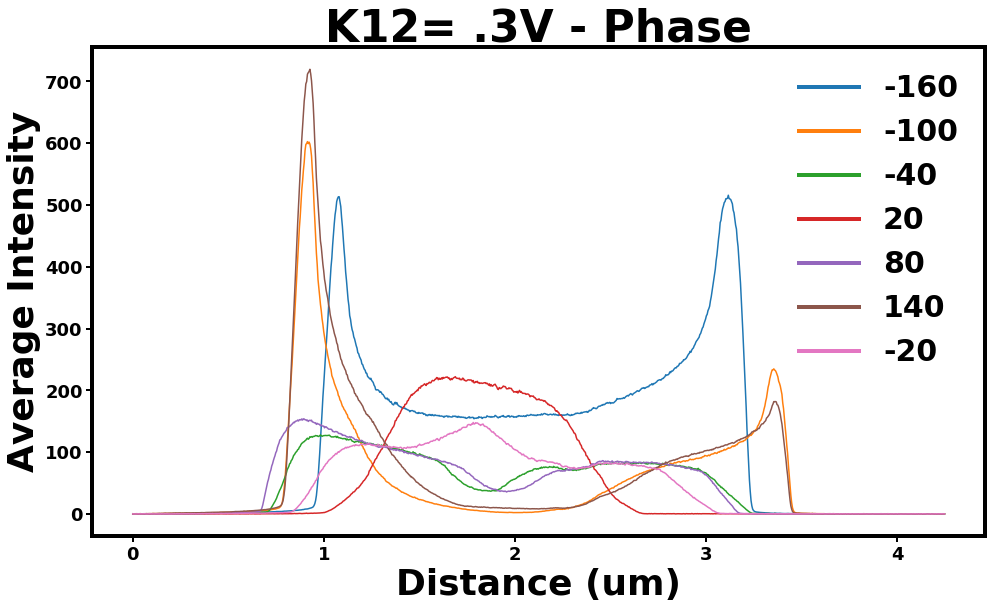

In [38]:
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,9)

Labels=['-160','-100','-40','20','80','140','-20']
fig, ax1 = plt.subplots()
plt.title('K12= .3V - Phase', fontsize=44, fontweight='bold')
ax1.set_xlabel('Distance (um)', fontsize=36, fontweight='bold')
ax1.set_ylabel('Average Intensity', fontsize=36, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
data_select=[28,29,30,27,31,32,33]
for a,k in enumerate(data_select):
    ax1.plot(X,z_lave[:,k]-min(z_lave[:,k]), label=Labels[a])

leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

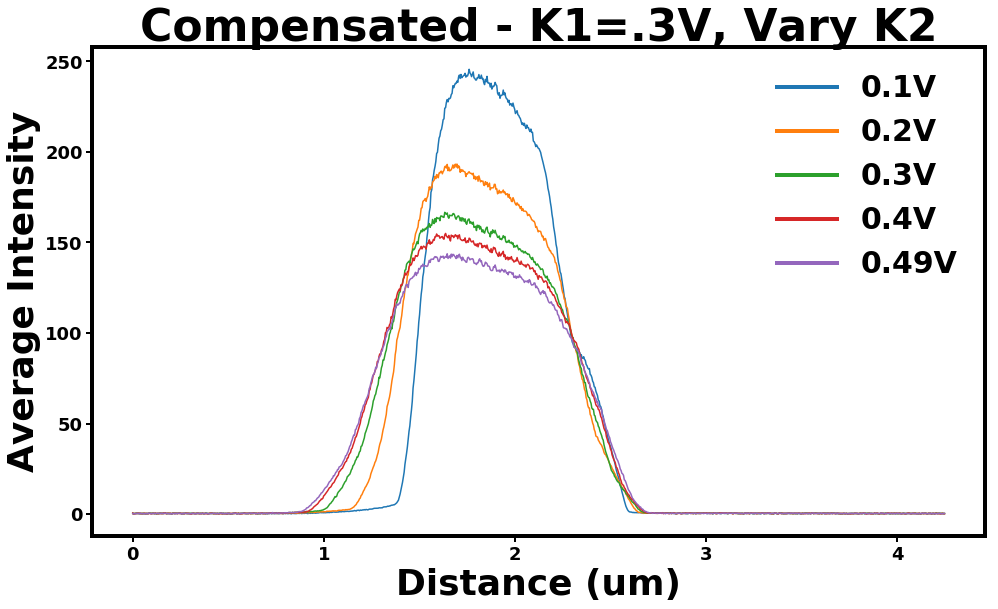

In [39]:
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,9)

Labels=['0.1V','0.2V','0.3V','0.4V','0.49V']
fig, ax1 = plt.subplots()
plt.title('Compensated - K1=.3V, Vary K2', fontsize=44, fontweight='bold')
ax1.set_xlabel('Distance (um)', fontsize=36, fontweight='bold')
ax1.set_ylabel('Average Intensity', fontsize=36, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
data_select=[34,35,36,37,38]
for a,k in enumerate(data_select):
    ax1.plot(X,z_lave[:,k]-min(z_lave[:,k]), label=Labels[a])

leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

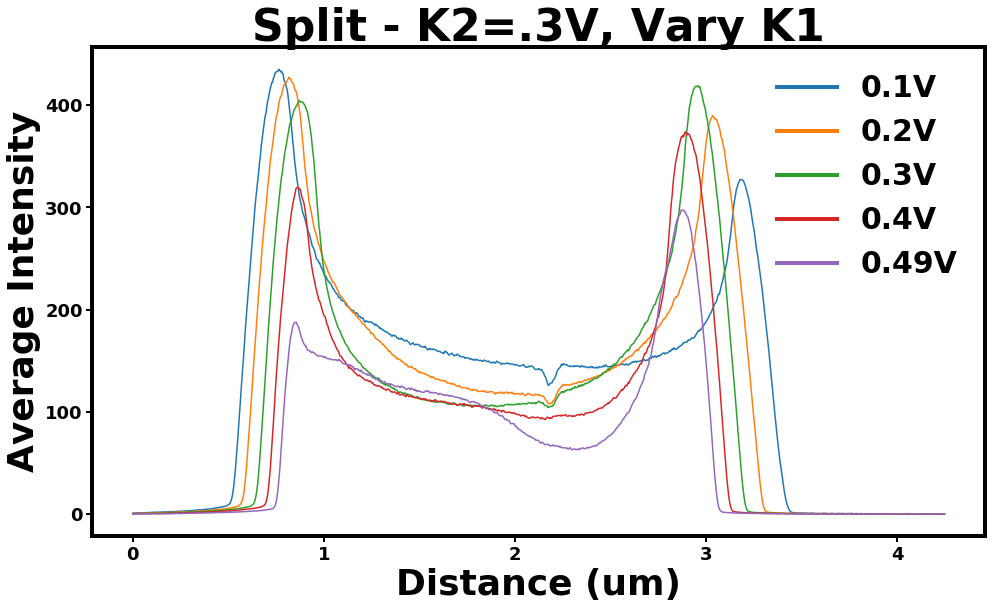

In [40]:
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,9)

Labels=['0.1V','0.2V','0.3V','0.4V','0.49V']
fig, ax1 = plt.subplots()
plt.title('Split - K2=.3V, Vary K1', fontsize=44, fontweight='bold')
ax1.set_xlabel('Distance (um)', fontsize=36, fontweight='bold')
ax1.set_ylabel('Average Intensity', fontsize=36, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
data_select=[40,41,42,43,44]
for a,k in enumerate(data_select):
    ax1.plot(X,z_lave[:,k]-min(z_lave[:,k]), label=Labels[a])

leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

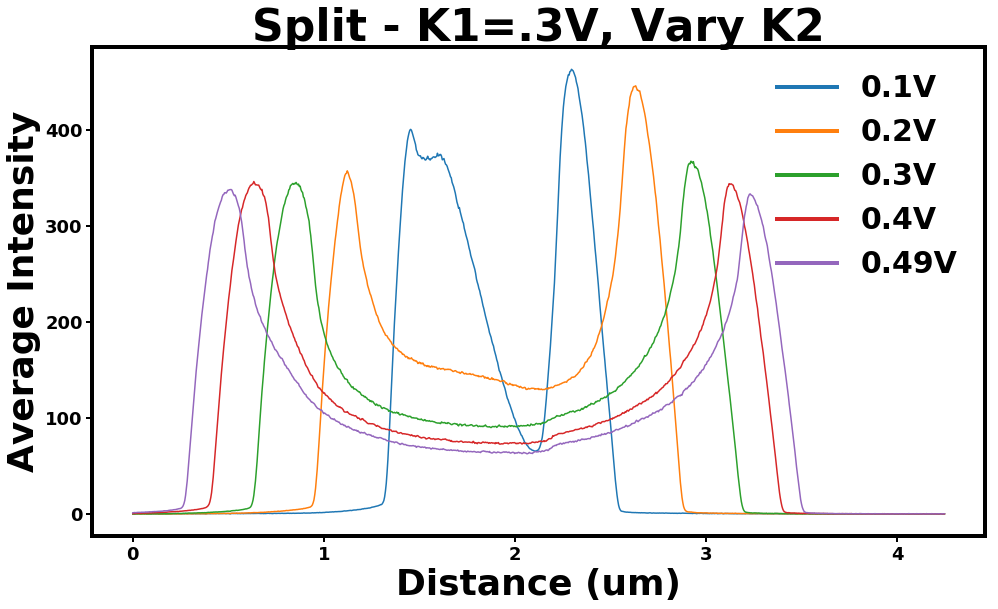

In [41]:
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,9)

Labels=['0.1V','0.2V','0.3V','0.4V','0.49V']
fig, ax1 = plt.subplots()
plt.title('Split - K1=.3V, Vary K2', fontsize=44, fontweight='bold')
ax1.set_xlabel('Distance (um)', fontsize=36, fontweight='bold')
ax1.set_ylabel('Average Intensity', fontsize=36, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
data_select=[45,46,47,48,49]
for a,k in enumerate(data_select):
    ax1.plot(X,z_lave[:,k]-min(z_lave[:,k]), label=Labels[a])

leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

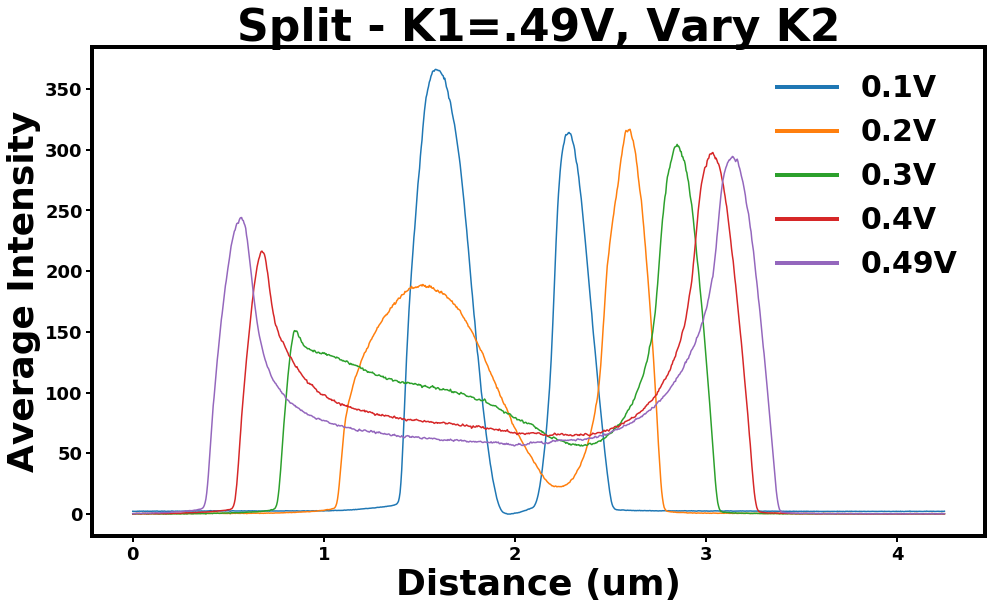

In [44]:
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,9)

Labels=['0.1V','0.2V','0.3V','0.4V','0.49V']
fig, ax1 = plt.subplots()
plt.title('Split - K1=.49V, Vary K2', fontsize=44, fontweight='bold')
ax1.set_xlabel('Distance (um)', fontsize=36, fontweight='bold')
ax1.set_ylabel('Average Intensity', fontsize=36, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
data_select=[50,51,52,53,54]
for a,k in enumerate(data_select):

    ax1.plot(X,z_lave[:,k]-min(z_lave[:,k]), label=Labels[a])

leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

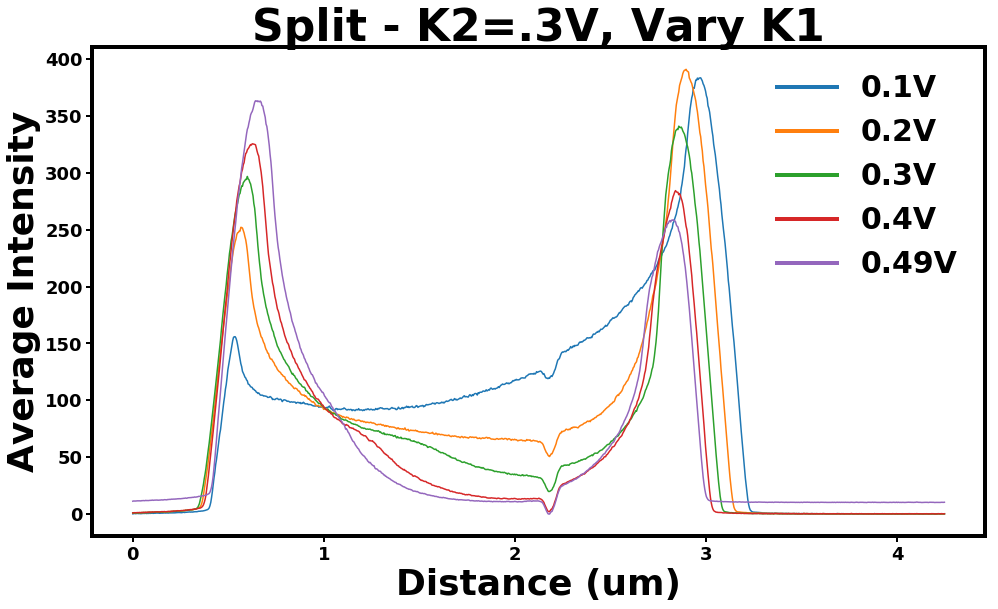

In [46]:
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,9)

Labels=['0.1V','0.2V','0.3V','0.4V','0.49V']
fig, ax1 = plt.subplots()
plt.title('Split - K2=.3V, Vary K1', fontsize=44, fontweight='bold')
ax1.set_xlabel('Distance (um)', fontsize=36, fontweight='bold')
ax1.set_ylabel('Average Intensity', fontsize=36, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
data_select=[56,57,58,59,60]
for a,k in enumerate(data_select):

    ax1.plot(X,z_lave[:,k]-min(z_lave[:,k]), label=Labels[a])

leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

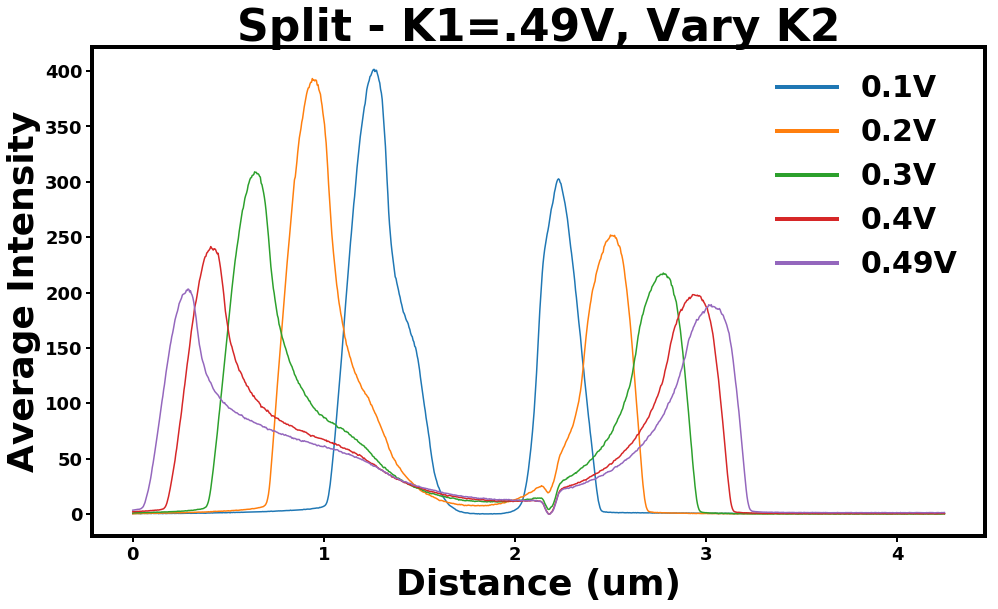

In [47]:
'''Sets up plot parameters and generates plot'''
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=4
n_rows=int(np.ceil(len(file_list)/3))
plt.rcParams['figure.figsize'] = (16,9)

Labels=['0.1V','0.2V','0.3V','0.4V','0.49V']
fig, ax1 = plt.subplots()
plt.title('Split - K1=.49V, Vary K2', fontsize=44, fontweight='bold')
ax1.set_xlabel('Distance (um)', fontsize=36, fontweight='bold')
ax1.set_ylabel('Average Intensity', fontsize=36, fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax1.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
data_select=[66,67,68,69,70]
for a,k in enumerate(data_select):
    
    ax1.plot(X,z_lave[:,k]-min(z_lave[:,k]), label=Labels[a])

leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

In [27]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [29]:
a[np.where(a<5)]=0

In [30]:
a

array([[0, 0, 0],
       [0, 5, 6],
       [7, 8, 9]])